In [1]:
from src.model.tile_types import TileType
from src.functions.custom_functions import get_tiles

from matplotlib import pyplot as plt
from img_tuiles import TUILES as IMG_TILES

from sklearn.model_selection import train_test_split
from sklearn import tree
from os import listdir

import pickle

import cv2 as cv
import numpy as np
import pandas as pd

['mysteres01.jpg', 'mysteres02.jpg', 'mysteres03.jpg', 'mysteres04.jpg', 'mysteres05.jpg', 'mysteres06.jpg', 'mysteres07.jpg', 'mysteres08.jpg', 'mysteres09.jpg', 'mysteres10.jpg', 'mysteres11.jpg', 'mysteres12.jpg', 'mysteres13.jpg', 'mysteres14.jpg', 'mysteres15.jpg']


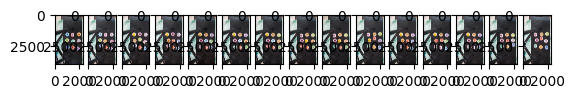

In [2]:
# Retrieve every jpg images in the ./images repository
files = listdir("./images")
images = sorted([file for file in files if file.endswith(".jpg")])
print(images)

cv_images = [cv.imread("./images/" + image) for image in images]
cv_images_rgb = [cv.cvtColor(image, cv.COLOR_BGR2RGB) for image in cv_images]

# Iterate through the image to display them on a row
for i, image in enumerate(cv_images_rgb):
    plt.subplot(1, len(cv_images_rgb), i + 1)
    plt.imshow(image)

In [3]:
cv_images_tiles = [get_tiles(image) for image in cv_images_rgb]
cv_images_tiles

[ 516 1332   75]
[706 836  76]
[964 814  77]
[494 820  75]
[ 960 1074   77]
[ 710 1342   75]
[ 914 1386   76]
[ 728 1096   76]
[ 486 1048   74]
[494 820  75]
[ 690 1090   75]
[952 830  77]
[ 710 1340   75]
[ 964 1106   77]
[ 530 1268   75]
[ 914 1384   76]
[708 834  76]
[ 488 1048   74]
[ 720 1024   75]
[ 530 1268   75]
[ 710 1342   75]
[486 820  75]
[ 930 1122   77]
[718 810  76]
[ 906 1374   75]
[ 510 1072   74]
[952 830  77]
[ 532 1272   75]
[ 742 1086   76]
[ 910 1376   77]
[ 944 1098   77]
[ 710 1342   75]
[716 810  76]
[954 830  77]
[486 820  75]
[ 548 1060   76]
[486 820  75]
[ 504 1310   75]
[ 722 1348   75]
[ 910 1328   76]
[ 730 1076   76]
[726 834  76]
[ 518 1064   74]
[ 926 1098   77]
[954 848  77]
[ 730 1074   76]
[486 820  75]
[ 968 1096   77]
[ 530 1324   74]
[ 722 1346   75]
[ 518 1062   75]
[724 834  75]
[ 988 1334   77]
[956 850  77]
[ 730 1074   76]
[488 820  75]
[ 524 1288   75]
[ 722 1346   75]
[962 848  77]
[ 970 1094   77]
[724 834  75]
[ 518 1062   75]
[ 988 133

[[<src.model.tile.Tile at 0x7f778b5ffbb0>,

In [4]:
for i, tiles in enumerate(cv_images_tiles):
    img_id = "M" + str(i + 1)
    tile_ids = IMG_TILES[img_id]
    
    for (id, tile) in zip(tile_ids, tiles):
        tile.set_tile_id(id)
        tile.set_img_id(img_id)
        print(tile)

Tile: {(494, 820, 75), (106.40062270025474, 100.78431927540333, 225.21330314180582), 0, 0, M1}
Tile: {(706, 836, 76), (169.0097199977909, 59.55453793103448, 221.57257931034482), 1, 1, M1}
Tile: {(964, 814, 77), (12.843817320120637, 126.46960494490729, 226.78097285675892), 2, 2, M1}
Tile: {(486, 1048, 74), (34.54695231996274, 102.04694589877836, 201.2108416215902), 3, 3, M1}
Tile: {(728, 1096, 76), (88.73283202477054, 60.5623929735403, 200.2783448275862), 4, 4, M1}
Tile: {(960, 1074, 77), (157.2900965011591, 26.70495592345732, 203.43026068261221), 5, 5, M1}
Tile: {(516, 1332, 75), (114.75567506368526, 116.96365694876876, 203.39824511746392), 6, 6, M1}
Tile: {(710, 1342, 75), (20.343739079790332, 113.97696009057458, 228.62541749221626), 7, 7, M1}
Tile: {(914, 1386, 76), (138.7495724137931, 60.92093793103448, 194.38383448275863), 8, 8, M1}
Tile: {(494, 820, 75), (104.11129361123697, 68.33969530497819, 234.2204924992924), 0, 0, M2}
Tile: {(708, 834, 76), (165.4112, 42.21368275862069, 230.6

In [5]:
# Flatten cv_images_tiles
cv_images_tiles_flatten = [tile for tiles in cv_images_tiles for tile in tiles]
cv_images_tiles_flatten

In [6]:
# Create a dataframe with the tiles data as columns [hue, saturation, value, position_x, position_y, radius, tile_id]
# As each tiles are objects, we need to extract the data from each object
data = [[tile.color[0], tile.color[1], tile.color[2], tile.dimensions[0], tile.dimensions[1], tile.dimensions[2], tile.tile_id, tile.img_id] for tile in cv_images_tiles_flatten]
data

[[106.40062270025474,
  100.78431927540333,
  225.21330314180582,
  494,
  820,
  75,
  0,
  'M1'],
 [169.0097199977909,
  59.55453793103448,
  221.57257931034482,
  706,
  836,
  76,
  1,
  'M1'],
 [12.843817320120637,
  126.46960494490729,
  226.78097285675892,
  964,
  814,
  77,
  2,
  'M1'],
 [34.54695231996274,
  102.04694589877836,
  201.2108416215902,
  486,
  1048,
  74,
  3,
  'M1'],
 [88.73283202477054,
  60.5623929735403,
  200.2783448275862,
  728,
  1096,
  76,
  4,
  'M1'],
 [157.2900965011591,
  26.70495592345732,
  203.43026068261221,
  960,
  1074,
  77,
  5,
  'M1'],
 [114.75567506368526,
  116.96365694876876,
  203.39824511746392,
  516,
  1332,
  75,
  6,
  'M1'],
 [20.343739079790332,
  113.97696009057458,
  228.62541749221626,
  710,
  1342,
  75,
  7,
  'M1'],
 [138.7495724137931,
  60.92093793103448,
  194.38383448275863,
  914,
  1386,
  76,
  8,
  'M1'],
 [104.11129361123697,
  68.33969530497819,
  234.2204924992924,
  494,
  820,
  75,
  0,
  'M2'],
 [165.41

In [7]:
df = pd.DataFrame(data, columns=["hue", "saturation", "value", "position_x", "position_y", "radius", "tile_id", "img_id"])
df.head()

,hue,saturation,value,position_x,position_y,radius,tile_id,img_id
0,106.400623,100.784319,225.213303,494,820,75,0,M1
1,169.009720,59.554538,221.572579,706,836,76,1,M1
2,12.843817,126.469605,226.780973,964,814,77,2,M1
3,34.546952,102.046946,201.210842,486,1048,74,3,M1
4,88.732832,60.562393,200.278345,728,1096,76,4,M1


In [8]:
clf = tree.DecisionTreeClassifier()
X = df[["hue", "saturation", "value"]]
Y = df[['tile_id']]

In [9]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [11]:
predicted = clf.predict(X_test)
print(predicted)
print(Y_test)

[ 0 11  5  9  5 13  3  8  6  3  6  0 11 10  3 12  4  4 11  1 12  0  7 11
  1  9 11]
     tile_id
98         0
67        11
105        5
19         9
42         5
62        13
12         3
110        8
125        6
128        3
44         0
40         0
27        11
100       10
119        3
31        12
51         4
4          4
84        11
81         1
85        12
26         0
16         7
18        11
10         1
111        9
45        11


In [12]:
s = pickle.dumps(clf)
with open("./model/mysteres01.pkl", "wb") as file:
    file.write(s)